In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows=10
spray=pd.read_csv('../../input/clean/spray_cleaned.csv').drop(['Unnamed: 0'],axis=1)
train=pd.read_csv('../../input/clean/train_cleaned.csv').drop(['Unnamed: 0'],axis=1)
train=train.drop(['ERR', 'TARS'], axis=1)
test=pd.read_csv('../../input/clean/test_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [2]:
x=spray[spray['Date']=='2011-08-29']

In [3]:
x['Lat'].describe()

count    95.000000
mean     42.392331
std       0.001581
min      42.389460
25%      42.391232
50%      42.392428
75%      42.393198
max      42.395983
Name: Lat, dtype: float64

In [3]:
test['Date']=pd.to_datetime(test['Date'])
train['Date']=pd.to_datetime(train['Date'])
spray['Date']=pd.to_datetime(spray['Date'])

In [5]:
test['Date'].describe()

count                  116293
unique                     95
top       2012-07-09 00:00:00
freq                     1293
first     2008-06-11 00:00:00
last      2014-10-02 00:00:00
Name: Date, dtype: object

In [8]:
test['Date'].dt.year.

count    116293.000000
mean       2010.702759
std           2.128750
min        2008.000000
25%        2008.000000
50%        2010.000000
75%        2012.000000
max        2014.000000
Name: Date, dtype: float64

In [6]:
train['Date'].describe()

count                    8603
unique                     95
top       2007-08-01 00:00:00
freq                      283
first     2007-05-29 00:00:00
last      2013-09-26 00:00:00
Name: Date, dtype: object

In [10]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [3]:
test

,Id,Date,Species,Trap,Lat,Long,AddressAccuracy,ERR,PIP,REST,SAL,TARS,TERR,UNSPECIFIED CULEX
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,9,0,1,1,0,0,0,0
1,2,2008-06-11,CULEX RESTUANS,T002,41.954690,-87.800991,9,0,0,1,0,0,0,0
2,3,2008-06-11,CULEX PIPIENS,T002,41.954690,-87.800991,9,0,1,0,0,0,0,0
3,4,2008-06-11,CULEX SALINARIUS,T002,41.954690,-87.800991,9,0,0,0,1,0,0,0
4,5,2008-06-11,CULEX TERRITANS,T002,41.954690,-87.800991,9,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,CULEX SALINARIUS,T054C,41.925652,-87.633590,8,0,0,0,1,0,0,0
116289,116290,2014-10-02,CULEX TERRITANS,T054C,41.925652,-87.633590,8,0,0,0,0,0,1,0
116290,116291,2014-10-02,CULEX TARSALIS,T054C,41.925652,-87.633590,8,0,0,0,0,1,0,0
116291,116292,2014-10-02,UNSPECIFIED CULEX,T054C,41.925652,-87.633590,8,0,0,0,0,0,0,1


In [13]:
test['Trap'].value_counts()

T009    1528
T035    1520
T900    1468
T002     857
T008     822
        ... 
T092     760
T001     760
T142     760
T143     760
T081     760
Name: Trap, Length: 149, dtype: int64

#WEATHER

In [3]:
Station_locations={'1':[41.995, -87.933], '2':[41.786, -87.752]}

In [4]:
weather=pd.read_csv('../../input/clean/weather_cleaned.csv').drop(['Unnamed: 0'],axis=1)
weather['Date']=pd.to_datetime(weather['Date'])
weather=weather.drop(['SnowFall', 'Max_Snow_Depth', 'SeaLevel'], axis=1)

In [21]:
weather.columns.values

array(['Station', 'Date', 'Temp_Max', 'Temp_Min', 'Temp_Avg',
       'Temp_Norm_Dev', 'Temp_Dew_Point', 'Temp_Wet_Bulb', 'Heat', 'Cool',
       'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal', 'StnPressure',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'], dtype=object)

In [8]:
weather1=weather[weather['Station']==1].reset_index()
weather2=weather[weather['Station']==2].reset_index()

In [9]:
def time_diff(a,b):
    x=int(a)/100*60+(a%100)
    y=int(b)/100*60+(b%100)
    return abs(x-y)

def weather_extrap(colname):
    for i in range(len(weather_both[colname])):
          if np.isnan(weather_both[colname][i]):
                if np.isnan(weather1[colname][i])==False:
                    weather_both[colname][i]=weather1[colname][i]
                elif np.isnan(weather2[colname][i])==False:
                    weather_both[colname][i]=weather2[colname][i]
                else:
                    weather_both[colname][i]=.5*(weather_both[colname][i-1]+weather_both[colname][i+1])

In [38]:
weather_both=pd.DataFrame()
weather_both['Date']=weather1['Date']
weather_both['Temp_Min']=.5*(weather1['Temp_Min']+weather2['Temp_Min'])
weather_both['Temp_Max']=.5*(weather1['Temp_Max']+weather2['Temp_Max'])
weather_both['Temp_Avg']=.5*(weather1['Temp_Avg']+weather2['Temp_Avg'])
weather_both['Temp_Dew_Point']=.5*(weather1['Temp_Dew_Point']+weather2['Temp_Dew_Point'])
weather_both['Temp_Wet_Bulb']=.5*(weather1['Temp_Wet_Bulb']+weather2['Temp_Wet_Bulb'])
weather_both['StnPressure']=.5*(weather1['StnPressure']+weather2['StnPressure'])
weather_both['Day_Length']=[time_diff(_[1]['Sunrise'], _[1]['Sunset']) for _ in weather1.iterrows()]
weather_both['Ht_Cool']=weather1['Heat']-weather1['Cool']

In [39]:
weather_extrap('Temp_Wet_Bulb')
weather_extrap('StnPressure')
weather_extrap('Temp_Avg')

/home/rb/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/rb/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/rb/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
def spray_factor(row):
    Date = row.Date
    Lat = row.Lat
    Long = row.Long   
    rel=spray[(spray['Date']<Date) & ((Date-spray['Date'])<pd.Timedelta('14 days'))]
    s=0
    for _ in rel.iterrows():
        latdiff=Lat-_[1]['Lat']
        longdiff=Long-_[1]['Long']
        dis=.5**(latdiff**2+longdiff**2)
        t=(Date-_[1]['Date']).days
        s+=(.5)**(t/1.5)/dis
    return s

In [110]:
df=train.merge(weather_both, on='Date')

In [116]:
df['spray_factor'] = df.apply(spray_factor, axis=1)

In [126]:
df.to_csv('train_weather_sprayfactor.csv')

In [140]:
df.columns.values

array(['Date', 'Species', 'Trap', 'Lat', 'Long', 'AddressAccuracy',
       'WnvPresent', 'NumMosquitos', 'PIP', 'REST', 'SAL', 'TERR',
       'Temp_Min', 'Temp_Max', 'Temp_Avg', 'Temp_Dew_Point',
       'Temp_Wet_Bulb', 'StnPressure', 'Day_Length', 'Ht_Cool',
       'spray_factor'], dtype=object)

In [169]:
from sklearn.model_selection import train_test_split
from datetime import date
dfX=df.drop(['NumMosquitos', 'WnvPresent', 'Species', 'Trap'], axis=1)
dfX['Date']=df['Date'].apply(date.toordinal)
y1=df['NumMosquitos']
y2=df['WnvPresent']
dfX_train, dfX_test, y1_train, y1_test, y2_train, y2_test=train_test_split(dfX,y1,y2)

In [5]:
weather

,Station,Date,Temp_Max,Temp_Min,Temp_Avg,Temp_Norm_Dev,Temp_Dew_Point,Temp_Wet_Bulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed
0,1.0,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,0.0,2.0,448.0,1849.0,,0.00,29.10,1.7,27.0,9.2
1,2.0,2007-05-01,84.0,52.0,68.0,NaN,51.0,57.0,0.0,3.0,NaN,NaN,,0.00,29.18,2.7,25.0,9.6
2,1.0,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,14.0,0.0,447.0,1850.0,BR,0.00,29.38,13.0,4.0,13.4
3,2.0,2007-05-02,60.0,43.0,52.0,NaN,42.0,47.0,13.0,0.0,NaN,NaN,BR HZ,0.00,29.44,13.3,2.0,13.4
4,1.0,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,9.0,0.0,446.0,1851.0,,0.00,29.39,11.7,7.0,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2.0,2014-10-29,49.0,40.0,45.0,NaN,34.0,42.0,20.0,0.0,NaN,NaN,,0.00,29.42,8.5,29.0,9.0
2940,1.0,2014-10-30,51.0,32.0,42.0,-4.0,34.0,40.0,23.0,0.0,622.0,1649.0,,0.00,29.34,5.1,24.0,5.5
2941,2.0,2014-10-30,53.0,37.0,45.0,NaN,35.0,42.0,20.0,0.0,NaN,NaN,RA,NaN,29.41,5.9,23.0,6.5
2942,1.0,2014-10-31,47.0,33.0,40.0,-6.0,25.0,33.0,25.0,0.0,623.0,1647.0,RA SN,0.03,29.49,22.6,34.0,22.9


In [ ]:
def weatherize(Trap_df, Weather_df, func, column, T_delta):
    """Takes a time series data frame i.e. test or train, takes the weather_clean data frame 
    with a time series index, applies a function to the given column for a time range """
    
    col_name = column
    func_name = func.__name__
    time_name = '_'.join(str(T_delta).split()[0:2])
    
    what_were_doing_here = "{0}_{1}_{2}".format(func_name,col_name,time_name)

    print what_were_doing_here
    
    days = Trap_df.groupby('Date')
    
    for day in days.groups.items():

        # groups.items retruns a tuple for some reason
        d = pd.to_datetime(day[0])

        # all the traps on this day
        Trap_day = Trap_df[Trap_df.index == d]
        
        # a thing that will filter the weather 
        date_mask = (Weather_df.index > d - T_delta)\
                  & (Weather_df.index < d)
            
        # weather filtered by the date range thing /\
        W_in_t_range = W[date_mask]
        
        # if there is weather data in the date range
        if W_in_t_range.shape[0] > 0:
            
            #Thing is a summery stat for the column and timeframe
            thing = func(W_in_t_range[column])  
            
            # put the thing in the place where it goes, for the day it relates to
            Trap_df.loc[d, what_were_doing_here] = thing          

# make it go go go 

t_frames = [pd.Timedelta('3 days'),
            pd.Timedelta('7 days'),
            pd.Timedelta('10 days'),
            pd.Timedelta('20 days'),
            pd.Timedelta('30 days'),
            pd.Timedelta('45 days')]

stuff_dict = {'Temp_Max' : max,
              'Temp_Min' : min,
              'PrecipTotal' : sum,
              'PrecipTotal' : max, 
              'Temp_Dew_Point' : max,
              'Temp_Dew_Point' : min,
              'StnPressure' : max,
              'StnPressure' : min}


for col, func in stuff_dict.iteritems() :
    print
    print col, func
    
    for t_frame in t_frames :
        print t_frame
        weatherize(Traps, W, func, col, t_frame)

In [193]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [194]:
weather_both

,Date,Temp_Min,Temp_Max,Temp_Avg,Temp_Dew_Point,Temp_Wet_Bulb,StnPressure,Day_Length,Ht_Cool
0,2007-05-01,51.0,83.5,67.5,51.0,56.5,29.140,841.0,-2.0
1,2007-05-02,42.5,59.5,51.5,42.0,47.0,29.410,843.0,14.0
2,2007-05-03,47.0,66.5,57.0,40.0,49.0,29.425,845.0,9.0
3,2007-05-04,50.0,72.0,58.0,41.5,50.0,29.335,848.0,7.0
4,2007-05-05,53.5,66.0,60.0,38.5,49.5,29.430,850.0,5.0
...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,52.5,78.0,65.5,51.5,58.5,28.960,635.0,1.0
1468,2014-10-28,46.5,67.0,57.0,39.0,47.5,29.190,632.0,8.0
1469,2014-10-29,38.0,49.0,44.0,33.0,41.0,29.390,630.0,22.0
1470,2014-10-30,34.5,52.0,43.5,34.5,41.0,29.375,627.0,23.0


In [195]:
df=train.merge(weather_)

,Date,Species,Trap,Lat,Long,AddressAccuracy,WnvPresent,NumMosquitos,PIP,REST,...,TERR,Temp_Min,Temp_Max,Temp_Avg,Temp_Dew_Point,Temp_Wet_Bulb,StnPressure,Day_Length,Ht_Cool,spray_factor
0,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,8,0,1,1,1,...,0,62.5,88.0,75.5,58.5,65.5,29.415,896.0,-9.0,0.0
1,2007-05-29,CULEX RESTUANS,T048,41.867108,-87.654224,8,0,2,0,1,...,0,62.5,88.0,75.5,58.5,65.5,29.415,896.0,-9.0,0.0
2,2007-05-29,CULEX RESTUANS,T091,41.862292,-87.648860,8,0,1,0,1,...,0,62.5,88.0,75.5,58.5,65.5,29.415,896.0,-9.0,0.0
3,2007-05-29,CULEX RESTUANS,T049,41.896282,-87.655232,8,0,1,0,1,...,0,62.5,88.0,75.5,58.5,65.5,29.415,896.0,-9.0,0.0
4,2007-05-29,CULEX RESTUANS,T153,41.907645,-87.760886,8,0,1,0,1,...,0,62.5,88.0,75.5,58.5,65.5,29.415,896.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598,2013-09-26,CULEX PIPIENS,T138,41.726465,-87.585413,5,0,6,1,0,...,0,52.5,75.0,64.0,52.0,58.0,29.370,719.0,2.0,0.0
8599,2013-09-26,CULEX PIPIENS/RESTUANS,T138,41.726465,-87.585413,5,0,4,1,1,...,0,52.5,75.0,64.0,52.0,58.0,29.370,719.0,2.0,0.0
8600,2013-09-26,CULEX PIPIENS/RESTUANS,T089,41.723195,-87.649970,5,0,4,1,1,...,0,52.5,75.0,64.0,52.0,58.0,29.370,719.0,2.0,0.0
8601,2013-09-26,CULEX PIPIENS/RESTUANS,T090,41.868077,-87.666901,9,0,2,1,1,...,0,52.5,75.0,64.0,52.0,58.0,29.370,719.0,2.0,0.0


In [202]:
weather_shift=pd.DataFrame()
def weather_tshift():
    tdelts=[1,2,4,7,14]
    for col in weather_both.drop('Date').columns.values:
        

,Date,Temp_Min,Temp_Max,Temp_Avg,Temp_Dew_Point,Temp_Wet_Bulb,StnPressure,Day_Length,Ht_Cool
0,2007-05-01,51.0,83.5,67.5,51.0,56.5,29.140,841.0,-2.0
1,2007-05-02,42.5,59.5,51.5,42.0,47.0,29.410,843.0,14.0
2,2007-05-03,47.0,66.5,57.0,40.0,49.0,29.425,845.0,9.0
3,2007-05-04,50.0,72.0,58.0,41.5,50.0,29.335,848.0,7.0
4,2007-05-05,53.5,66.0,60.0,38.5,49.5,29.430,850.0,5.0
...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,52.5,78.0,65.5,51.5,58.5,28.960,635.0,1.0
1468,2014-10-28,46.5,67.0,57.0,39.0,47.5,29.190,632.0,8.0
1469,2014-10-29,38.0,49.0,44.0,33.0,41.0,29.390,630.0,22.0
1470,2014-10-30,34.5,52.0,43.5,34.5,41.0,29.375,627.0,23.0


In [4]:
min(train['Date'])

Timestamp('2007-05-29 00:00:00')

In [7]:
min(weather['Date'])

Timestamp('2007-05-01 00:00:00')

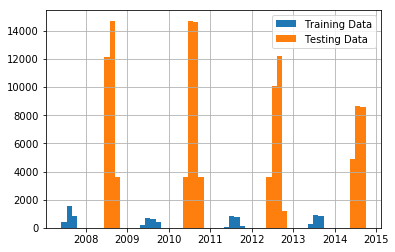

In [11]:
import matplotlib.pyplot as plt
train['Date'].hist(bins=50)
test['Date'].hist(bins=50)
plt.legend(['Training Data', 'Testing Data'])
plt.show()

In [16]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

457

,Date,Species,Trap,Lat,Long,AddressAccuracy,WnvPresent,NumMosquitos,PIP,REST,SAL,TERR
0,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,8,0,1,1,1,0,0
1,2007-05-29,CULEX RESTUANS,T048,41.867108,-87.654224,8,0,2,0,1,0,0
2,2007-05-29,CULEX RESTUANS,T091,41.862292,-87.648860,8,0,1,0,1,0,0
3,2007-05-29,CULEX RESTUANS,T049,41.896282,-87.655232,8,0,1,0,1,0,0
4,2007-05-29,CULEX RESTUANS,T153,41.907645,-87.760886,8,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8598,2013-09-26,CULEX PIPIENS,T138,41.726465,-87.585413,5,0,6,1,0,0,0
8599,2013-09-26,CULEX PIPIENS/RESTUANS,T138,41.726465,-87.585413,5,0,4,1,1,0,0
8600,2013-09-26,CULEX PIPIENS/RESTUANS,T089,41.723195,-87.649970,5,0,4,1,1,0,0
8601,2013-09-26,CULEX PIPIENS/RESTUANS,T090,41.868077,-87.666901,9,0,2,1,1,0,0
